<a href="https://colab.research.google.com/github/leeesoraaa/TIL/blob/main/data%20analysis/colab/practice_drinks_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음주 데이터셋 분석하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터셋 로딩

In [ ]:
drinks = pd.read_csv('drinks.csv')

## 데이터셋 기본 정보

In [ ]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 결측 데이터 전처리

In [ ]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [ ]:
# 결측데이터의 대체: 기타대륙(OT)
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

## 인사이트 탐색

In [ ]:
raw = drinks
# 알코올 소비량이 가장 높은 나라
raw[raw['total_litres_of_pure_alcohol'] == max(raw['total_litres_of_pure_alcohol'])]
## Belarus의 알코올 소비량이 가장 높다.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU


In [ ]:
# 알코올 소비량이 가장 높은 대륙
raw.groupby(by=['continent']).sum()
## EU 의 알코올 소비량이 가장 높다.

<ipython-input-94-1007ef174748>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw.groupby(by=['continent']).sum()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
OC,1435,935,570,54.1
OT,3345,3812,564,137.9
SA,2101,1377,749,75.7


In [ ]:
# 대한민국의 알코올 소비 패턴 분석
drinks[drinks['country'] == 'South Korea']
## 대한민국의 총 알코올 소비량은 9.8이다.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,AS


In [ ]:
drinks = drinks.sort_values('total_litres_of_pure_alcohol',ascending=False)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,OT
45,Czech Republic,361,170,134,11.8,EU


In [ ]:
drinks['rank'] = drinks['total_litres_of_pure_alcohol'].rank(ascending=False)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,rank
15,Belarus,142,373,42,14.4,EU,1.0
98,Lithuania,343,244,56,12.9,EU,2.0
3,Andorra,245,138,312,12.4,EU,3.0
68,Grenada,199,438,28,11.9,OT,4.0
45,Czech Republic,361,170,134,11.8,EU,5.5


In [ ]:
drinks[drinks['country'] == 'South Korea']
## 대한민국의 총 알코올 소비량은 전체 나라 중 28위이다.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,rank
138,South Korea,140,16,9,9.8,AS,28.0


In [ ]:
Asia = drinks[drinks['continent'] == 'AS']
Asia.head()
## 대한민국의 총 알코올 소비량은 아시아에서 2위이다.

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,rank
141,Russian Federation,247,326,73,11.5,AS,7.0
138,South Korea,140,16,9,9.8,AS,28.0
85,Japan,77,202,16,7.0,AS,52.5
87,Kazakhstan,124,246,12,6.8,AS,56.5
169,Thailand,99,258,1,6.4,AS,66.5


# 피처들 간의 상관관계 분석

In [ ]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
# 'beer_servings'와 'wine_servings'
# pearson
corr = drinks[['beer_servings', 'wine_servings']].corr(method='pearson')
print(corr)
## 양의 상관관계로 맥주 소비량이 높을수록 와인 소비량도 높다.

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [ ]:
# 여러 피처들 간의 상관관계 분석
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [ ]:
print(type(corr))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
import seaborn as sns

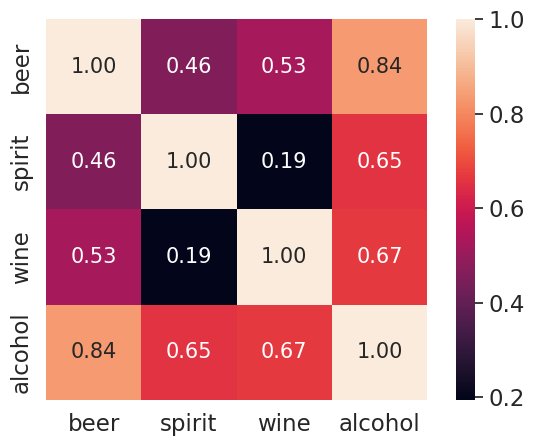

In [ ]:
# heatmap(히트맵): 피처들 간의 상관계수를 시각화할 떄 가장 많이 사용하는 도구
# 상관행렬을 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(
    corr.values,
    cbar = True,
    annot = True,
    square = True,
    fmt = '.2f',
    yticklabels = cols_view,
    xticklabels = cols_view,
    annot_kws = {'size': 15}
)

plt.tight_layout()
plt.show()

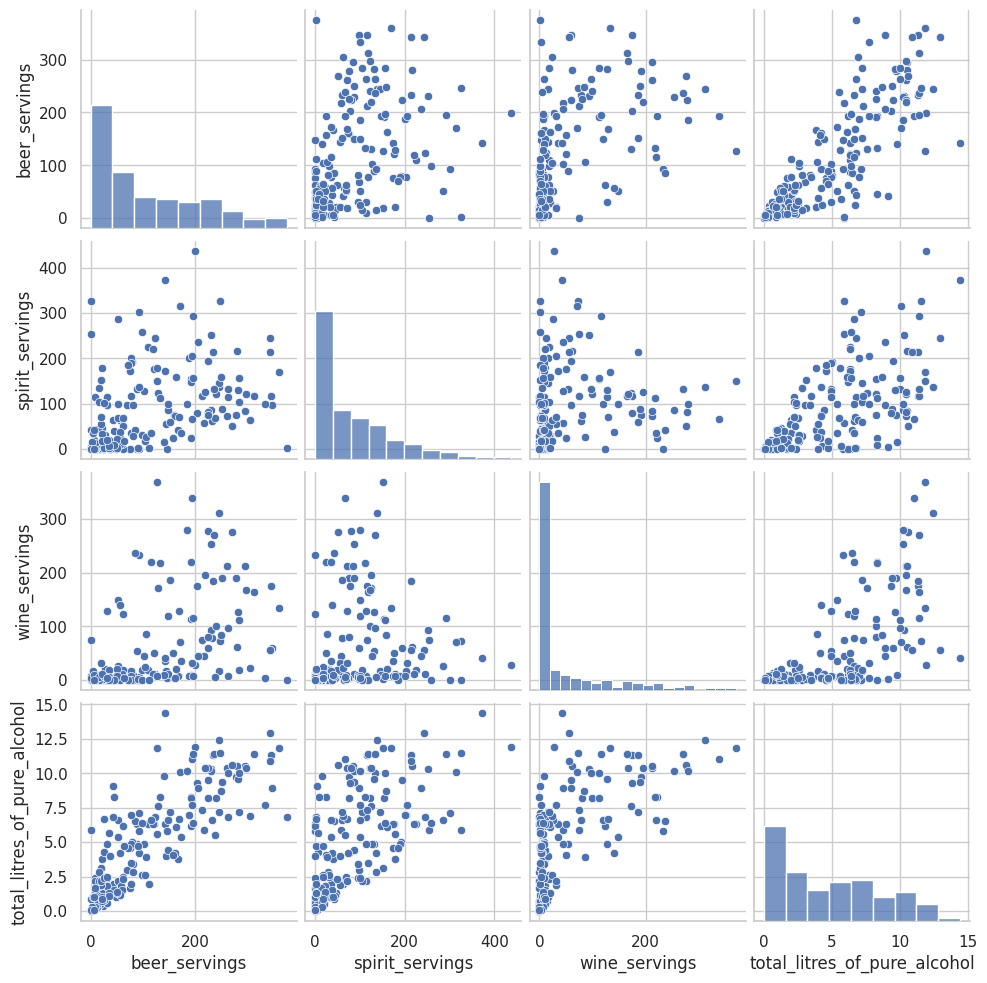

In [ ]:
# scatter plot(산점도 or 산포도)
# pairplot: 여러 개의 피처들의 상관관계를 나타내는 seaborn의 산점도 그래프
sns.set(style = 'whitegrid')
sns.pairplot(drinks[['beer_servings', 'spirit_servings',
                    'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)

plt.show()

## 대륙별 국가 수의 빈도를 시각화 하는 작업
### 범주형 데이터의 빈도 수를 시각화 할 떄 파이차트 주로 사용

In [ ]:
# value_counts(): 개별 건수를 추출하는 메서드로 시리즈 객체에서 사용된다.
data = drinks['continent'].value_counts()
data

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [ ]:
labels = data.index.tolist()
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [ ]:
fact = data.values.tolist()
fact

[53, 45, 44, 23, 16, 12]

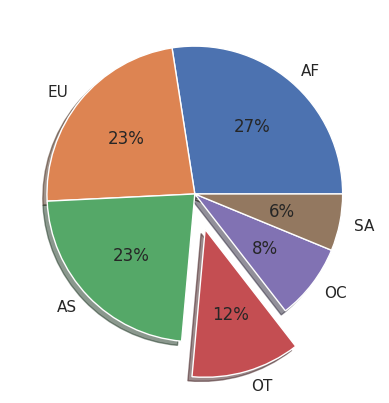

In [ ]:
explode =(0,0,0,0.25,0,0)

plt.pie(fact,
        explode = explode,
        labels = labels,
        autopct = '%.0f%%',
        shadow = True)
plt.show()

# 대륙별 분석
- apply.agg

In [ ]:
# 대륙별 beer_servings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345
SA,175.083333,93,333,2101


In [ ]:
# 전체 알코올 평균보다 더 많은 알코올을 섭취하는 대륙을 추출하시오.
## 전체 알코올 평균
alcohol_mean = drinks.total_litres_of_pure_alcohol.mean()

## 대륙별 알코올 평균
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()

## 평균보다 더 많은 알코올을 섭취하는 대륙
result = continent_mean[continent_mean >= alcohol_mean]
print(result)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [ ]:
# 평균 beer_servings이 가장 높은 대륙
## idxmax(), idxmin()
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

In [ ]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [ ]:
# 대륙별 beer_servings의 평균, 최소, 최대, 합계 시각화
result = drinks.groupby('continent').beer_servings.agg(['mean', 'max', 'min', 'sum'])
result

,mean,max,min,sum
continent,,,,
AF,61.471698,376,0,3258
AS,37.045455,247,0,1630
EU,193.777778,361,0,8720
OC,89.687500,306,0,1435
OT,145.434783,285,1,3345
SA,175.083333,333,93,2101


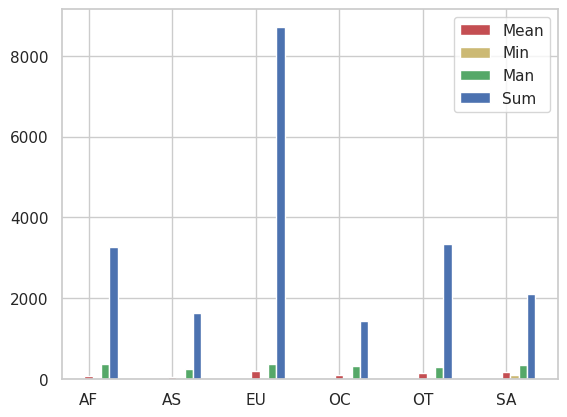

In [ ]:
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

n_groups = len(result.index)

index = np.arange(n_groups)
bar_width = 0.1

graph1 = plt.bar(index, means, bar_width, color='r', label = 'Mean')
graph2 = plt.bar(index+bar_width, mins, bar_width, color='y', label = 'Min')
graph3 = plt.bar(index+bar_width*2, maxs, bar_width, color='g', label = 'Man')
graph4 = plt.bar(index+bar_width*3, sums, bar_width, color='b', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [ ]:
# 대륙별 알코올 소비량 시각화. 단, 마지막에 평균 알코올 소비량을 추가할 것
## 전체 알코올 평균
alcohol_mean = drinks.total_litres_of_pure_alcohol.mean()

## 대륙별 알코올 평균
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
print(continent_mean)

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


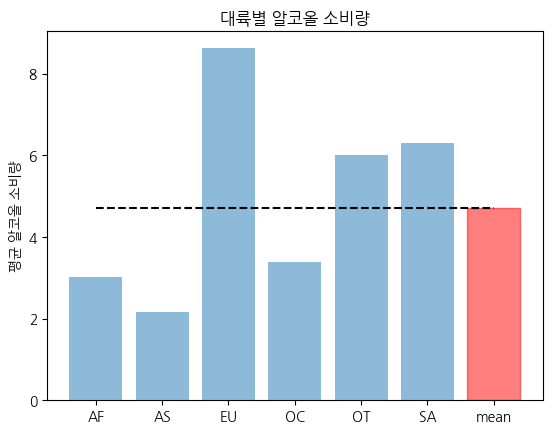

In [ ]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(alcohol_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')

plt.xticks(x_pos, continents)
plt.ylabel('평균 알코올 소비량')
plt.title('대륙별 알코올 소비량')

# plt.plot([x축시작, x축마지막], [y축시작, y축마지막], 'k--')  평균 가로선
plt.plot([0,6], [alcohol_mean, alcohol_mean], 'k--')


plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumGothic')

In [ ]:
plt.rcParams["axes.unicode_minus"]=False

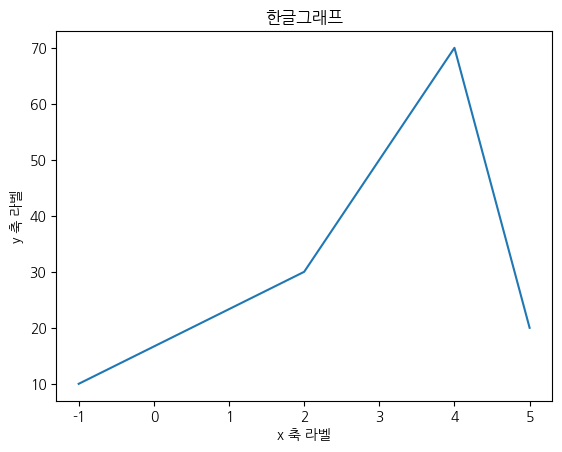

In [ ]:
x=[-1, 2, 3, 4,5]
y = [10, 30, 50, 70, 20]

# 한글 라벨을 사용한 그래프
plt.plot(x, y)
plt.title('한글그래프')
plt.xlabel('x 축 라벨')
plt.ylabel('y 축 라벨')
plt.show()

In [ ]:
# 평균 beer_servings이 가장 높은 대륙
## idxmax(), idxmin()
beer_continent = drinks.groupby('continent').beer_servings.mean()
beer_mean = drinks.beer_servings.mean()

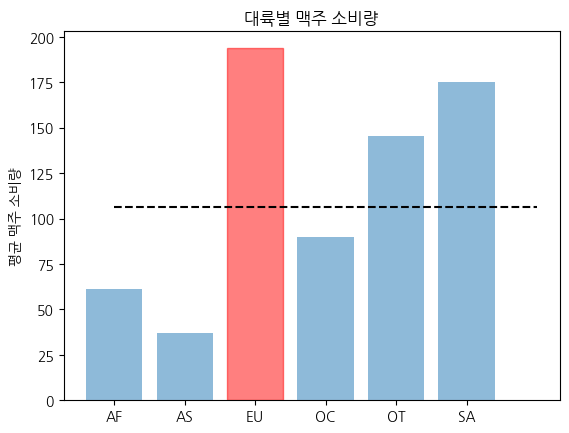

In [ ]:
# 평균 맥주 소비량을 대륙별로 시각화하고 가장 높은 대륙의 색상을 다르게 설정하시오.
continents = beer_continent.index.tolist()
y_pos = np.arange(len(continents))
beers = beer_continent.tolist()

bar = plt.bar(y_pos, beers, align='center', alpha=0.5)
bar[beers.index(max(beers))].set_color('r')

plt.xticks(x_pos, continents)
plt.ylabel('평균 맥주 소비량')
plt.title('대륙별 맥주 소비량')

# plt.plot([x축시작, x축마지막], [y축시작, y축마지막], 'k--')  평균 가로선
plt.plot([0,6], [beer_mean, beer_mean], 'k--')

plt.show()

In [ ]:
beers

[61.471698113207545,
 37.04545454545455,
 193.77777777777777,
 89.6875,
 145.43478260869566,
 175.08333333333334]

In [ ]:
max(beers)

193.77777777777777

In [ ]:
a = input(int)

<class 'int'>2
